In [202]:
%reset -f
import pandas as pd
import numpy as np
from wavhandler import *
import soundfile as sf
import seaborn as sns
sns.set()
# import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20.0, 10.0))
%matplotlib inline

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.


In [203]:
mydata = Dataset('leafminer_all')#'leek_leafminers')#'leafminer_all')#LG2/LG_suzukii_18_09_faulty')
mydata.load();

100%|██████████| 10/10 [00:00<00:00, 112.93it/s]


In [204]:
df_feats = mydata.get_sensor_features(temp_humd=False)
# df_psd = make_df_parallel(names=mydata.filenames, setting='psd_dB')
df = df_feats

In [212]:
from scipy import signal
from scipy.signal import find_peaks

alldata = read_simple(df.filenames.tolist())[0]
alldata = transform_data(alldata.T)

100%|██████████| 701/701 [00:00<00:00, 1763.26it/s]


In [213]:
alldata.shape

(701, 129)

In [214]:
first_3_freqpeaks = []
all_freqs = []
for i in range(len(alldata)):
    x = alldata[i,:]
#     x = alldata[np.random.randint(0,176),:]
    peaks = find_peaks(x, height=-90, distance=1, width=0)#find_peaks(x, height=-90, distance=1)[0]
    fr_peaks = pd.Series(np.linspace(0,4092,129)[peaks[0]][:3])
    tmp = [np.NaN for i in range(3)]
    for j in range(len(fr_peaks)):
        tmp[j] = fr_peaks[j]
    first_3_freqpeaks.append(pd.Series(tmp))
    all_freqs = all_freqs + fr_peaks.tolist()
    

In [215]:
pd.Series(all_freqs).value_counts()
# pd.Series(all_freqs).hist(bins=10, range=(0, 400))#list(np.linspace(0,4000, 20)))

31.96875     683
223.78125    280
447.56250    162
255.75000    121
415.59375    116
479.53125    101
191.81250     85
383.62500     38
287.71875     29
511.50000     29
351.65625     24
127.87500     16
319.68750     13
63.93750      13
159.84375      7
543.46875      7
703.31250      2
607.40625      2
95.90625       2
575.43750      1
639.37500      1
767.25000      1
dtype: int64

In [216]:
df_3freqpeaks = pd.concat(first_3_freqpeaks, axis=1).T

In [217]:
df_3freqpeaks.head()

,0,1,2
0,31.96875,639.37500,703.3125
1,31.96875,NaN,NaN
2,63.93750,415.59375,511.5000
3,31.96875,NaN,NaN
4,31.96875,NaN,NaN


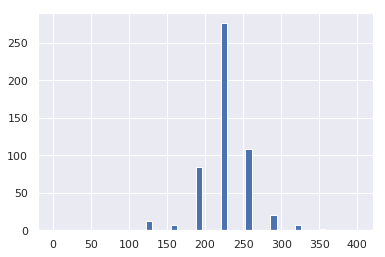

In [218]:
df_3freqpeaks[1].hist(bins=list(np.linspace(0,400, 50)))

In [219]:
df_3freqpeaks[1].value_counts()

223.78125    276
255.75000    108
191.81250     85
287.71875     21
127.87500     13
319.68750      7
159.84375      7
447.56250      3
351.65625      2
415.59375      2
639.37500      1
479.53125      1
Name: 1, dtype: int64